In [ ]:
# Workflow
# Example of a torch project

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# 1: Data (how to prepare and load data)
# Get data in numerical representation (into tensors)


# 2: Build the model

In [ ]:
X = torch.arange(0, 30)
Y = torch.arange(30, 60)
# Y = a + bX -> a = 30 and b = 1 linear regression

In [ ]:
plt.plot(X, Y)

In [ ]:
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [ ]:
weight = 1
bias = 30

X = torch.arange(0, 30).unsqueeze(dim=1)
X

In [ ]:
Y = weight * X + bias
Y

In [ ]:
fig, ax = plt.subplots()
ax.plot(X.squeeze(), Y.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [ ]:
# Splitting data training set, validation set, test set
weight = 0.01
bias = 0.3
SAMPLES = 1000

X = torch.arange(0, SAMPLES/1000, 1 / 1000).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

In [ ]:
fig, ax = plt.subplots()
ax.plot(X_train.squeeze(), Y_train.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [ ]:
def pp(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize=(10, 10))
    
    # plotting the train and test
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

    # predictions
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
    plt.legend(prop={"size" : 14})

In [ ]:
pp(X_train, Y_train, X_test, Y_test)

In [ ]:

pp(X_train, Y_train, X_test, Y_test, Y_test)

In [ ]:
# Splitting data training set, validation set, test set
weight = 0.01
bias = 0.30
SAMPLES = 1000

X = torch.arange(0, SAMPLES/1000, 1/1000).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

In [ ]:
# Now lets create the predictions
# Create the model with linear regression
class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
    def __init__(self):
        super().__init__()
        # This are the parameters that the model wants to learn
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    # Forward functions define the computations of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# The goal of the model is to predict the correct weight and bias
# Il will adjust the weight and bias to get it correct
# With liear is using gradient decent to get to the ideal values

In [ ]:
# !! Now we need to train the model with the data !!
# l_model = LinearRegressionModel()

#predictions = l_model.forward(X_train)
# Print
# pp(X_train, Y_train, X_test, Y_test, predictions)


In [ ]:
# We want to know wat is insede the module
torch.manual_seed(432)

# Create an instance of the class
model = LinearRegressionModel()
params = list(model.parameters())
print(params)
(model.state_dict())

In [ ]:
# What we want is that model.state_dict() is as close as possible as a and b of Y = a + bX

In [ ]:
# Without training we can try to predict Y_test

# Inference (making a prediction !)

In [ ]:
with torch.inference_mode():
    predictions = model(X_test)

In [ ]:
print(predictions[10: 20])

In [ ]:
pp(X_train, Y_train, X_test, Y_test, predictions)

In [ ]:
# This graph is not good, as we can see the prediction is random# Splitting data training set, validation set, test set
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

# model = LinearRegressionModel()
# with torch.inference_mode():
#     predictions = model(X_test)

# We can mesure the model goodness using a loss function
# lossf = nn.L1Loss()
# output = lossf(predictions, Y_test)
# print(f"Loss: {output}")

# print(f"LossBack: {output.backward()}")

# Training (lets make it learn from data)

In [ ]:
# The optimizer will use a loss functino to understand how faroff of the goal it will be
# The optimizer will modify the parameters to lower the loss 

# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.001 # learning rate, a metaparameter
) 

# Optimizers and losses will come with experience

# Training loop and Testing loop
# 0. loop through the data
# 1. forward pass (data moving through the graph, make predictions)
# 2. Calculate the loss
# 3. Loss backward - move from the output to input to calculate gradients of the module
# 4. Optimization step:  gradient decent modify the weights
#   - this will adjust the parameters to reduce the loss

In [ ]:
# Training
torch.manual_seed(41)
model = LinearRegressionModel()
print(list(model.parameters()))
# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.001 # learning rate, a metaparameter
)

epochs = 5000 # Hyperparameter to know how many loops
for epoch in range(epochs):
    # Set to training mode (for this we need grad=True)
    model.train() # Set the model to allow for gradient decent

    # Farward pass
    new_y_pred = model(X_train)

    # Calculate Loss (pred, real)
    loss = loss_func(new_y_pred, Y_train)
    l = loss
    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Optimize
    optimizer.step()

    # Testing
    model.eval()

    # Print dict
    print(f"weight: {model.state_dict()['weight'].item()}, bias : {model.state_dict()['bias'].item()}, loss: {l}")

In [ ]:
# Lets see
print(list(model.parameters()))
with torch.inference_mode():
    predictions = model(X_test)
pp(X_train, Y_train, X_test, Y_test, predictions)

In [ ]:
import torch 
import torch.nn as nn

def run(device : str, epochs = 10000, weight = 1, bias = 30, SAMPLES = 1000, seed = 43252):
    torch.set_default_device(device)

    # Create the model with linear regression
    class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

    # Plotting
    def pp(train_data, train_labels, test_data, test_labels, predictions = None):
        train_data = train_data.cpu()
        train_labels = train_labels.cpu()
        test_data = test_data.cpu()
        test_labels = test_labels.cpu()

        plt.figure(figsize=(10, 10))
    
        # plotting the train and test
        plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
        plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

        # predictions
        if predictions != None:
            predictions = predictions.cpu()
            plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
        plt.legend(prop={"size" : 14})

    X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
    Y = weight * X + bias

    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    torch.manual_seed(seed)
    model = LinearRegressionModel()
    print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.001 # learning rate, a metaparameter
    )

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"weight: {model.state_dict()['weight'].item()}, bias : {model.state_dict()['bias'].item()}, loss: {l}")

    # Lets see
    print(list(model.parameters()))
    with torch.inference_mode():
        predictions = model(X_test)
    pp(X_train, Y_train, X_test, Y_test, predictions)


In [ ]:
%%time
run("cpu")

In [ ]:
%%time
run("cuda")

In [ ]:
%%time
run("cuda")

In [ ]:
run(device = "cpu",  epochs = 10000, weight = 0.45223, bias = 0.432, SAMPLES = 1000, seed = 43252)

In [ ]:
import torch 
import torch.nn as nn

def run(device : str, epochs = 10000, weight = 1, bias = 30, SAMPLES = 1000, seed = 43252):
    torch.set_default_device(device)

    # Create the model with linear regression
    class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

    # Plotting
    def pp(train_data, train_labels, test_data, test_labels, predictions = None):
        train_data = train_data.cpu()
        train_labels = train_labels.cpu()
        test_data = test_data.cpu()
        test_labels = test_labels.cpu()

        plt.figure(figsize=(10, 10))
    
        # plotting the train and test
        plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
        plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

        # predictions
        if predictions != None:
            predictions = predictions.cpu()
            plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
        plt.legend(prop={"size" : 14})

    X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
    Y = weight * X + bias

    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    torch.manual_seed(seed)
    model = LinearRegressionModel()
    print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.001 # learning rate, a metaparameter
    )

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_func(test_pred, Y_test)

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"epoch: {epoch} | weight: {model.state_dict()['weight'].item()}, bias: {model.state_dict()['bias'].item()}, loss: {l}, Tloss: {test_loss}")

    # Lets see
    print(list(model.parameters()))
    with torch.inference_mode():
        predictions = model(X_test)
    pp(X_train, Y_train, X_test, Y_test, predictions)

In [ ]:
run("cpu")

In [ ]:
for i in range(0, 10):
    run(device = "cuda", epochs = 200, weight = 1, bias = 30, SAMPLES = 500, seed = i)
    input()

In [29]:
import torch 
import torch.nn as nn

def run(device : str, epochs = 10000, weight = 1, bias = 30, SAMPLES = 1000, seed = 43252):
    torch.set_default_device(device)

    # Create the model with linear regression
    class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

    # Plotting
    def pp(train_data, train_labels, test_data, test_labels, predictions = None):
        train_data = train_data.cpu()
        train_labels = train_labels.cpu()
        test_data = test_data.cpu()
        test_labels = test_labels.cpu()

        plt.figure(figsize=(10, 10))
    
        # plotting the train and test
        plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
        plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

        # predictions
        if predictions != None:
            predictions = predictions.cpu()
            plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
        plt.legend(prop={"size" : 14})

    X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
    Y = weight * X + bias

    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    torch.manual_seed(seed)
    model = LinearRegressionModel()
    print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.0001 # learning rate, a metaparameter
    )

    # Saving loss and epoch
    saved_epochs = []
    saved_loss = []
    saved_tloss = []

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_func(test_pred, Y_test)

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"epoch: {epoch} | weight: {model.state_dict()['weight'].item()}, bias: {model.state_dict()['bias'].item()}, loss: {l}, Tloss: {test_loss}")

        saved_epochs.append(epoch)
        saved_loss.append(loss.item())
        saved_tloss.append(test_loss.item())

    # Lets see
    print(list(model.parameters()))
    with torch.inference_mode():
        predictions = model(X_test)
    pp(X_train, Y_train, X_test, Y_test, predictions)

    plt.figure(figsize=(10, 10))
    plt.plot(saved_epochs, saved_loss)
    plt.plot(saved_epochs, saved_tloss)
    

[Parameter containing:
tensor([-0.6014], requires_grad=True), Parameter containing:
tensor([-1.0122], requires_grad=True)]
epoch: 0 | weight: -0.5814428329467773, bias: -1.0121097564697266, loss: 350.4900817871094, Tloss: 741.8707275390625
epoch: 15 | weight: -0.2821929156780243, bias: -1.01060950756073, loss: 290.7882080078125, Tloss: 607.3563232421875
epoch: 30 | weight: 0.017057107761502266, bias: -1.0091092586517334, loss: 231.0863494873047, Tloss: 472.8419494628906
epoch: 45 | weight: 0.3163071274757385, bias: -1.0076090097427368, loss: 171.38446044921875, Tloss: 338.32757568359375
epoch: 60 | weight: 0.6155570149421692, bias: -1.0061087608337402, loss: 111.6825942993164, Tloss: 203.81324768066406
epoch: 75 | weight: 0.914806604385376, bias: -1.0046085119247437, loss: 51.980812072753906, Tloss: 69.29904174804688
epoch: 90 | weight: 1.108936071395874, bias: -1.0034102201461792, loss: 12.867609977722168, Tloss: 17.963346481323242
epoch: 105 | weight: 1.1096673011779785, bias: -1.002

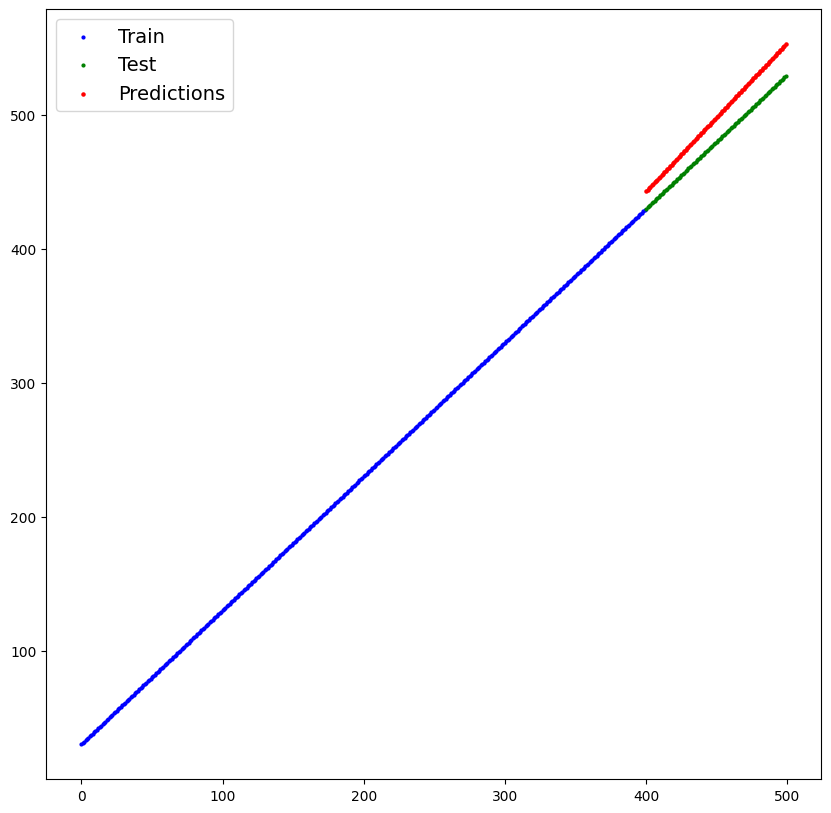

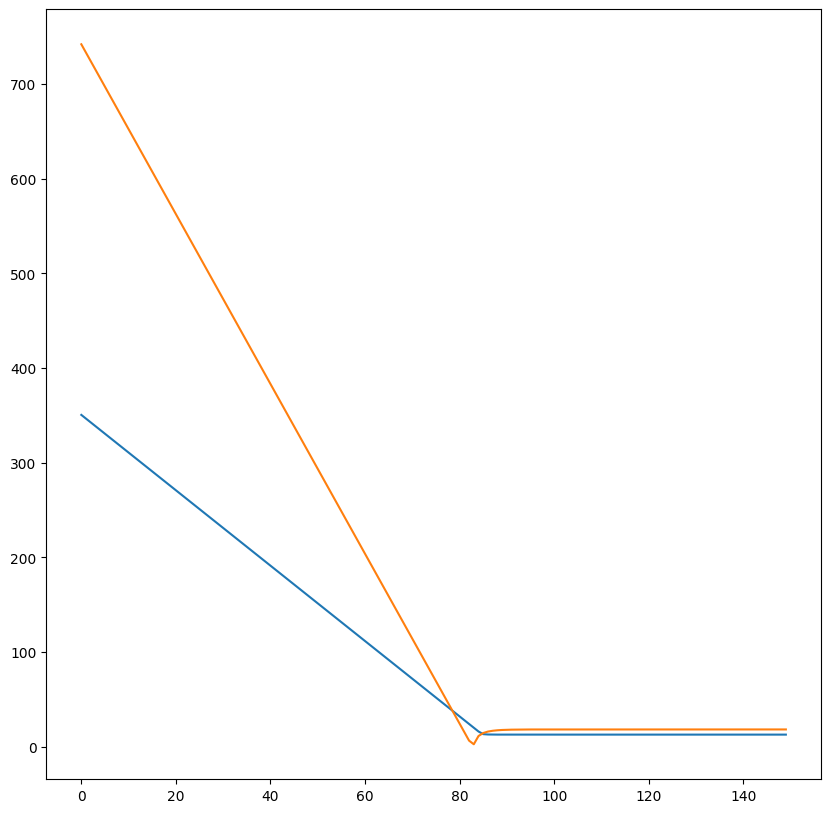

In [30]:
run(device = "cpu", epochs = 150, weight = 1, bias = 30, SAMPLES = 500, seed = 10)

In [41]:
# Saving a model after training
# You can do it in tree methods
# torch.save() in python pickele formats, serializing and desirializing
# torch.load() to load
# torch.nn.Module.load_state_dict() - to save the state dict

# Create the model
model_to_save = LinearRegressionModel()

from pathlib import Path

# Create a directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "03_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# Save the model as state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(model.state_dict(), MODEL_SAVE_PATH)

# Loading
modelcopy_sd = torch.load(MODEL_SAVE_PATH, weights_only=True)
modelcopy_sd
modelcopy = LinearRegressionModel()
modelcopy.load_state_dict(modelcopy_sd)
modelcopy.eval()
print(list(modelcopy.parameters()))

Saving the model to: models/03_workflow_model.pth
[Parameter containing:
tensor([0.7004], requires_grad=True), Parameter containing:
tensor([0.2994], requires_grad=True)]


In [90]:
import torch 
import torch.nn as nn

## Example:
## Y = X1 * 3 + X2 * 6 * X3 * 4 + 10
## X1 X2 X3
## 1  2  3
## 2  4  6
## 4  8  12
## 5  9  14
## 8  10  16

## a
## 3
## 6 
## 4

## b
## 10

X = torch.tensor([
    [1, 2, 3],
    [2, 4, 6],
    [4, 8, 12],
    [5, 9, 14],
    [8, 10, 16]
])

a = torch.tensor([
    [3], 
    [6], 
    [4]
])

b = torch.tensor(10)

# print(X.size())
# print(a.size())
# print(X)
# print(a)

Y = X @ a + b
# print(Y)

# Y = X1a1 + X2a2 + X3a3 + ... + XNaN + b
# len(a) is the number of regressors
# b is the intercept
def runMLin(epochs = 10000, NRegressors = 3, SAMPLES = 1000, seed = 43252):
    torch.set_default_device("cpu")

    # Create the model with linear regression
    class MultiLinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.a = nn.Parameter(torch.randn(size=(NRegressors, 1), requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return x @ a + self.bias

    # Create X and Y 
    torch.manual_seed(seed)
    X = torch.arange(SAMPLES, dtype=torch.float)
    for i in range(0, NRegressors-1):
        X = torch.vstack((X, torch.arange(SAMPLES, dtype=torch.float)))
    X = torch.transpose(X, 0, 1)
    a = torch.rand(size = (NRegressors, 1), dtype=torch.float)
    b = torch.rand(1)

    # Create equation
    Y = X @ a + b
    # print(f"Y: {Y}")

    # Device data
    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    model = MultiLinearRegressionModel()
    # print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.0001 # learning rate, a metaparameter
    )

    # Saving loss and epoch
    saved_epochs = []
    saved_loss = []
    saved_tloss = []

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_func(test_pred, Y_test)

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"epoch: {epoch} | a: {model.state_dict()['a']}, bias: {model.state_dict()['bias'].item()}, loss: {l}, Tloss: {test_loss}")

        # saved_epochs.append(epoch)
        # saved_loss.append(loss.item())
        # saved_tloss.append(test_loss.item())
    
    return model.state_dict()['a'], a

res, actual = runMLin(epochs=10000, NRegressors=2, SAMPLES=1000, seed=3)
print(f"res-actual: \n{res-actual}, \nres: \n{res}, \nactual: \n{actual}")

res, actual = runMLin(epochs=100000, NRegressors=5, SAMPLES=1000, seed=3)
print(f"res-actual: \n{res-actual}, \nres: \n{res}, \nactual: \n{actual}")

epoch: 0 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.44263991713523865, loss: 0.1568978875875473, Tloss: 0.15679931640625
epoch: 1000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.3426531255245209, loss: 0.056909915059804916, Tloss: 0.0568084716796875
epoch: 2000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 3000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 4000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 5000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 6000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 7000 | a: tensor([[0.2453],
        [1.1186]]), bias: 